# Operations on Distributions

This notebook is for Chapter 6 of [Think Stats - Probability and Statistics for Programmers](http://greenteapress.com/thinkstats/) by Allen B Downey.

Objective: Combining random variables from different distributions and forming new random variables.

In [1]:
from __future__ import division, print_function
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
%matplotlib inline

## Skewness

Measures assymetry of a distribution. By definition:

$$g_{1} = \frac{m_{3}}{m_{2}^{3/2}}$$

$$m_{2} = \frac{1}{n} \sum (x_{i} - \mu)^{2}$$

$$m_{3} = \frac{1}{n} \sum (x_{i} - \mu)^{3}$$

Negative skewness = distribution skews left, extends further to left than right and vice versa for positive skewness.

__Pearson's median skewness__ is another measure of skewness that captures the relationship between the mean $\mu$ and median $\mu_{1/2}$. Robust statistic, ie, less vulnerable to the impact of outliers.

$$g_{p} = \frac{3 (\mu - \mu_{1/2})}{\sigma}$$

__Exercise 6.1:__ Write function called skewness that computes $g_{1}$ for a sample. Compute skewness for pregnancy length and birth weight. Are the results consistent with the shape of the distributions? Also write a function called pearson\_skewness that computes $g_{p}$ for these distributions. How does $g_{p}$ compare with $g_{1}$?

_Both $g_{1}$ and $g_{p}$ are negative for both pregnancy length and birth weights, which is also borne out by the shape of the distributions. However, $g_{p}$ values are less extreme than $g_{1}$._

In [2]:
def skewness(xs):
    mean = np.mean(xs)
    m2 = np.mean(np.power((xs - mean), 2))
    m3 = np.mean(np.power((xs - mean), 3))
    g1 = m3 / math.pow(m2, 1.5)
    return g1

def pearson_skewness(xs):
    mean = np.mean(xs)
    median = np.median(xs)
    std = np.std(xs)
    return 3 * (mean - median) / std

In [3]:
pregnancies = pd.read_fwf("2002FemPreg.dat", 
                         names=["caseid", "nbrnaliv", "babysex", "birthwgt_lb",
                               "birthwgt_oz", "prglength", "outcome", "birthord",
                               "agepreg", "finalwgt"],
                         colspecs=[(0, 12), (21, 22), (55, 56), (57, 58), (58, 60),
                                (274, 276), (276, 277), (278, 279), (283, 285), (422, 439)])
pregnancies.head()

,caseid,nbrnaliv,babysex,birthwgt_lb,birthwgt_oz,prglength,outcome,birthord,agepreg,finalwgt
0,1,1.0,1.0,8.0,13.0,39,1,1.0,33.0,6448.271112
1,1,1.0,2.0,7.0,14.0,39,1,2.0,39.0,6448.271112
2,2,3.0,1.0,9.0,2.0,39,1,1.0,14.0,12999.542264
3,2,1.0,2.0,7.0,0.0,39,1,2.0,17.0,12999.542264
4,2,1.0,2.0,6.0,3.0,39,1,3.0,18.0,12999.542264


In [4]:
live_births = pregnancies[pregnancies["outcome"] == 1]
preg_lengths = np.array(live_births["prglength"].dropna())
live_births["tot_birthwgt"] = 16 * live_births["birthwgt_lb"] + live_births["birthwgt_oz"]
birth_weights = np.array(live_births["tot_birthwgt"].dropna())

print("Pregnancy lengths: skewness = %.3f, pearson skewness = %.3f" % 
      (skewness(preg_lengths), pearson_skewness(preg_lengths)))
print("Birth Weights: skewness = %.3f, pearson skewness = %.3f" % 
      (skewness(birth_weights), pearson_skewness(birth_weights)))

Pregnancy lengths: skewness = -2.855, pearson skewness = -0.488
Birth Weights: skewness = -1.318, pearson skewness = -0.382


C:\Users\diptiwar\AppData\Local\Temp\ipykernel_13264\2791627503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  live_births["tot_birthwgt"] = 16 * live_births["birthwgt_lb"] + live_births["birthwgt_oz"]


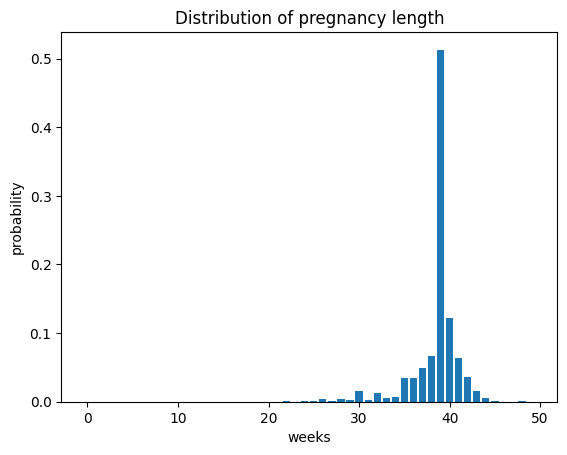

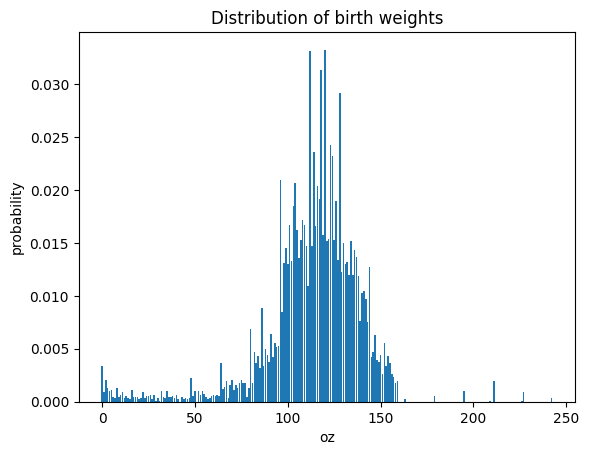

In [5]:
range_lb = np.min(preg_lengths)
range_ub = np.max(preg_lengths)
nbr_bins = range_ub - range_lb
pmf_preg_lengths = np.histogram(preg_lengths, bins=nbr_bins, range=(range_lb, range_ub), 
                                density=True)
plt.bar(pmf_preg_lengths[1][:-1], pmf_preg_lengths[0])
plt.title("Distribution of pregnancy length")
plt.xlabel("weeks")
plt.ylabel("probability")
plt.show()

range_lb = np.min(birth_weights)
range_ub = np.max(birth_weights)
nbr_bins = int(range_ub - range_lb)
pmf_birth_weights = np.histogram(birth_weights, bins=nbr_bins, range=(range_lb, range_ub), 
                                 density=True)
plt.bar(pmf_birth_weights[1][:-1], pmf_birth_weights[0])
plt.title("Distribution of birth weights")
plt.xlabel("oz")
plt.ylabel("probability")
plt.show()

__Exercise 6.3:__ From the IRS dataset, what fraction of the population reports a taxable income below the mean? Compute the median, mean, skewness and Pearson’s skewness of the income
data. Because the data has been binned, you will have to make some approximations.

Compute the [Gini Coefficient](https://en.wikipedia.org/wiki/Gini_coefficient) for this distribution. Hint: use PMF to compute relative mean difference. The approach used is to consider the Gini coefficient as half of the [relative mean absolute difference](https://en.wikipedia.org/wiki/Mean_absolute_difference#Relative_mean_absolute_difference), ie.

In [6]:
income_dist = [(0, 2489989), (2500, 11638707), (7500, 12139638), 
               (12500, 11702056), (17500, 11076002), (22500, 9866247), 
               (27500, 8743581), (35000, 14554280), (45000, 11087123), 
               (62500, 19196461), (87500, 11729485), (150000, 13851341),
               (350000, 3476747), (750000, 577618), (1250000, 140635), 
               (1750000, 59460), (3500000, 86329), (7500000, 21390), 
               (15000000, 13480)]
pop = []
for income, nbr_reporters in income_dist:
    for i in range(nbr_reporters):
        pop.append(income)
population = np.array(pop)
mean = np.mean(population)
nbr_pop = population.shape[0]
nbr_below_mean = np.where(population < mean)[0].shape[0]
median = np.median(population)
skewness = skewness(pop)
pearson_skewness = pearson_skewness(pop)
print("Fraction of population reporting below mean income: %.3f" % (nbr_below_mean / nbr_pop))
print("Mean of distribution: %.2f" % (mean))
print("Median of distribution: %.2f" % (median))
print("Skewness of distribution: %.3f" % (skewness))
print("Pearson Skewness of distribution: %.3f" % (pearson_skewness))

Fraction of population reporting below mean income: 0.655
Mean of distribution: 61983.04
Median of distribution: 35000.00
Skewness of distribution: 42.450
Pearson Skewness of distribution: 0.381


In [7]:
# adapted from gini.py
diffs = {}
for x1, f1 in income_dist:
    for x2, f2 in income_dist:
        dx = math.fabs(x1 - x2)
        df = f1 * f2
        if diffs.has_key(dx):
            diffs[dx] += df
        else:
            diffs[dx] = df
sum_diffs = 0
len_diffs = 0
for x in diffs.keys():
    sum_diffs += x * diffs[x]
    len_diffs += diffs[x]
mean_diff = sum_diffs / len_diffs
rel_mean_diff = mean_diff / mean
gini = rel_mean_diff / 2
print("GINI coefficient: %.3f" % (gini))

AttributeError: 'dict' object has no attribute 'has_key'

# Random Variables

Represents a process that generated it. It is a random value selected from a distribution.

__Exercise 6.4:__ Write a definition for a class that represents a random variable with a [Gumbel Distribution](http://wikipedia.org/wiki/Gumbel_distribution).


$$Q(U) = \mu - \beta ln (-ln(U))$$

In [ ]:
class RandomVariable(object):
    """ Parent class of all random variables """
    
class Exponential(RandomVariable):
    def __init__(self, lam):
        self.lam = lam
    def generate(self):
        return np.random.exponential(self.lam)

class Gumbel(RandomVariable):
    def __init__(self, mu, beta):
        self.mu = mu
        self.beta = beta
    def generate(self):
        return self.mu - (self.beta * math.log(-math.log(np.random.random(), math.e), math.e))

e = Exponential(0.1)
print("exponential(0.1) = %.3f" % (e.generate()))
g = Gumbel(1.0, 0.5)
print("gumbel(1.0, 0.5) = %.3f" % (g.generate()))

## PDFs

The derivative of a CDF is called a PDF (probability density function). 

$$PDF_{expo}(x) = \lambda e^{-\lambda x}$$

$$PDF_{normal}(x) = \frac{1}{\sigma \sqrt{2 \pi}} exp \left [ -\frac{1}{2} \left ( \frac{x - \mu}{\sigma} \right )^{2} \right ]$$

Evaluating a PDF at some x results in a __probability density__. To get the __probability mass__, we have to integrate over x. For example, the probability that X falls within (-0.5, 0.5) is:

$$P(-0.5 \leq X < 0.5) = \int_{-0.5}^{0.5} PDF_{X}(x) dx$$

or equivalently:

$$P(-0.5 \leq X < 0.5) = CDF_{X}(0.5) - CDF_{X}(-0.5)$$

__Exercise 6.5:__ What is the probability that a value chosen from an exponential distribution with parameter $\lambda$ falls between 1 and 20. Express answer in terms of $\lambda$.

$$P(1 \leq X < 20) = \int_{1}^{20} \lambda e^{-\lambda x} dx = e^{-\lambda}(1 - e^{-19 \lambda})$$

__Exercise 6.6:__ Distribution of heights is roughly normal with $\mu$ = 178cm and $\sigma^{2}$ = 59.4 cm. In order to join the Blue Man group, you have to be between 177.8 and 185.4cm. What percentage of the male population is in this range?



In [8]:
norm = scipy.stats.norm(loc=178, scale=math.sqrt(59.4))
prob = norm.cdf(185.4) - norm.cdf(177.8)
print("percentage of male population in range: %.3f" % (prob * 100))

percentage of male population in range: 34.186


## Convolutions

Answers question - if we have two random variables X and Y, with distributions CDF(x) and CDF(y), what is the distribution for the sum Z = X + Y?

$$PDF_{Z}(z) = \int_{-\infty}^{\infty} PDF_{Y}(z-x)PDF_{X}(x)dx$$

$$PDF_{Z} = PDF_{Y} \star PDF_{X}$$

As an example, assuming X and Y are exponential distributions with parameter $\lambda$. Then the distribution of Z = X + Y is:

$$PDF_{Z}(z) = \int_{-\infty }^{\infty } PDF_{X}(x)PDF_{Y}(z-x) dx = \int_{-\infty }^{\infty } \lambda e^{-\lambda x} \lambda e^{\lambda (z-x)} dx$$

Since exponential is 0 for all negative values, we can adjust our limits:

$$PDF_{Z}(z) = \int_{0}^{z} \lambda e^{-\lambda x} \lambda e^{-\lambda(z - x)} dx = \lambda^{2} e^{-\lambda z} \int_{0}^{z} dx = \lambda^{2} z e^{-\lambda z}$$

__Exercise 6.7:__ If X has an exponential distribution with parameter $\lambda$ and Y has an Erlang distribution with parameters $\lambda$ and k, what is the distribution of the sum Z = X + Y?

$$PDF_{expo} = \lambda e^{-\lambda x}$$

$$PDF_{erlang} = \frac{\lambda^{k} x^{k-1} e^{-\lambda x}}{(k-1)!}$$

$$PDF_{Z}(z) = \int_{-\infty}^{\infty} PDF_{Y}(z-x) PDF_{X}(x) dx = \frac{\lambda^{k+1}}{(k-1)!} \int_{-\infty}^{\infty} (z-x)^{k-1} e^{-\lambda z} dx$$

__Exercise 6.9:__ If you are given PMF objects, you can compute the distribution of the sum (or max) by enumerating all pairs of values. Write a function that computes the PMF of Z = max(X, Y).

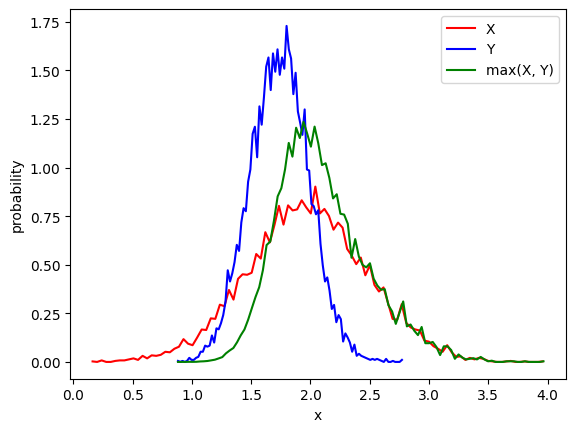

In [2]:
xs = np.random.normal(2, 0.5, 10000)
ys = np.random.normal(1.75, 0.25, 10000)
zs = []
for x in xs:
    for y in ys:
        zs.append(max(x, y))
        
pmf_xs = np.histogram(xs, bins=100, density=True)
pmf_ys = np.histogram(ys, bins=100, density=True)
pmf_zs = np.histogram(zs, bins=100, density=True)

plt.plot(pmf_xs[1][:-1], pmf_xs[0], color="red", label="X")
plt.plot(pmf_ys[1][:-1], pmf_ys[0], color="blue", label="Y")
plt.plot(pmf_zs[1][:-1], pmf_zs[0], color="green", label="max(X, Y)")
plt.xlabel("x")
plt.ylabel("probability")
plt.legend(loc="best")

## Why normal?

Normal distributions are closed under linear transformation and convolution. Assume a distribution $X \sim \mathcal{N} (\mu, \sigma^{2})$, the distribution over a linear transformation $X{}' = aX + b$ is given by:

$$X{}' \sim \mathcal{N} (a \mu + b, a^{2}\sigma^{2})$$

The distribution over a convolution Z = X + Y, where $X \sim \mathcal{N}(\mu_{X}, \sigma_{X^{2}})$ and $Y \sim \mathcal{N}(\mu_{Y}, \sigma_{Y^{2}})$ is given by:

$$Z \sim \mathcal{N}(\mu_{X} + \mu_{Y}, \sigma_{X}^{2} + \sigma_{X}^2)$$

__Exercise 6.10:__ If $X \sim \mathcal{N}(\mu_{X}, \sigma_{X^{2}})$ and $Y \sim \mathcal{N}(\mu_{Y}, \sigma_{Y^{2}})$, what is the distribution of Z = aX + bY?

$$aX \sim \mathcal{N} (a\mu_{X}, a^{2}\sigma_{X}^{2})$$

$$bY \sim \mathcal{N} (b\mu_{Y}, b^{2}\sigma_{Y}^{2})$$

$$Z \sim \mathcal{N} (a\mu_{X}+b\mu_{Y}, a^{2}\sigma_{X}^{2}+b^{2}\sigma_{Y}^{2})$$

__Exercise 6.11:__ Choose a pair of distributions (any two of exponential, normal, lognormal, and Pareto) and choose parameters that make their mean and variance similar. Generate random numbers from these distributions and compute the distribution of their sums. Use the tests from Chapter 4 to see if the sum can be modeled by a continuous distribution.

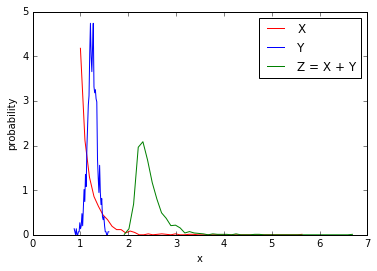

In [14]:
# X ~ Pareto distribution x_min = 1, alpha = 5
# from wikipedia page, mean = 1.25 and variance = 0.1
# Y ~ Normal mean = 1.25, variance = 0.1
xs = 1 + np.random.pareto(5, 1000)
ys = np.random.normal(1.25, 0.1, 1000)
zs = xs + ys

pmf_xs = np.histogram(xs, bins=50, normed=True)
pmf_ys = np.histogram(ys, bins=50, normed=True)
pmf_zs = np.histogram(zs, bins=50, normed=True)

plt.plot(pmf_xs[1][:-1], pmf_xs[0], color="red", label="X")
plt.plot(pmf_ys[1][:-1], pmf_ys[0], color="blue", label="Y")
plt.plot(pmf_zs[1][:-1], pmf_zs[0], color="green", label="Z = X + Y")
plt.xlabel("x")
plt.ylabel("probability")
plt.legend(loc="best")

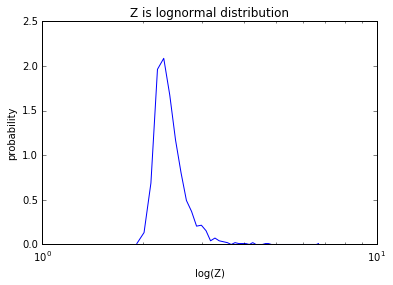

In [15]:
plt.semilogx(pmf_zs[1][:-1], pmf_zs[0])
plt.xlabel("log(Z)")
plt.ylabel("probability")
plt.title("Z is lognormal distribution")

## Central Limit Theorem

If we add up the values from almost any distribution, the distribution of the sums converge to normal. Further if the distribution has mean $\mu$ and standard deviation $\sigma$, then the distribution of the sum is approximately $\mathcal{N}(n\mu, n\sigma^{2})$.

Caveats:
* values have to be drawn independently
* values have to come from the same distribution
* values have to be drawn from a distribution with finite mean and variance (so no Pareto).
* number of values needed depends on skewness.

__Exercise 6.13:__ Choose a distribution (one of exponential, lognormal or Pareto) and choose values for the parameter(s). Generate samples with sizes 2, 4, 8, etc., and compute the distribution of their sums. Use a normal probability plot to see if the distribution is approximately normal. How many terms do you have to add to see convergence?

Text(0, 0.5, 'Sum of samples')

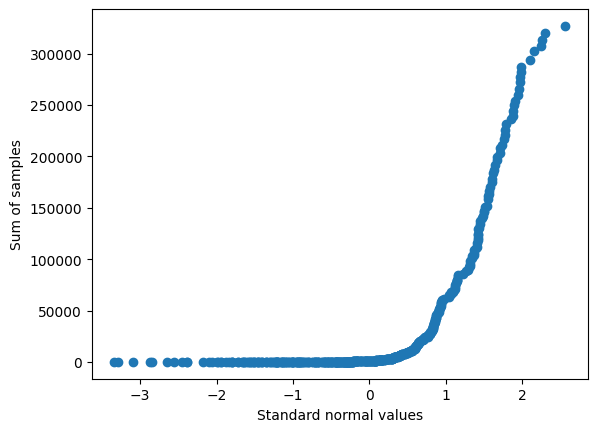

In [34]:
num_samples = 500
sample_sums = np.zeros(num_samples)
sample_sizes = np.logspace(1, 16, num=num_samples, endpoint=True, base=2)
for i in range(num_samples):
    samples = np.random.exponential(5, int(sample_sizes[i]))
    sample_sums[i] = np.sum(samples)
dataset = np.sort(sample_sums)

# normal_samples
normal_samples = np.sort(np.random.normal(0, 1, num_samples))
plt.scatter(normal_samples, dataset)
plt.xlabel("Standard normal values")
plt.ylabel("Sum of samples")